# Visual-Social CNN Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Introduction
This notebook is used to perform dimensionality reduction on the input features, and build, train and evaluate the VSCNN model.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA
import tensorflow as tf
from scipy import stats
import time

## 2 Workflow
The workflow of this activity is as follows.
- Data Preparation
- Dimensionality Reduction
- Model Building
- Model Training
- Model Evaluation

## 3 Data Preparation

In [ ]:
# Loading VGG-19 image features
vgg19_features = np.load('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/vgg19_features_20%.npy')
vgg19_features

array([[2.7530962e-01, 0.0000000e+00, 4.9113296e-04, ..., 1.3348418e-01,
        7.1556407e-01, 0.0000000e+00],
       [8.5240042e-01, 5.9496824e-02, 1.3975760e-02, ..., 1.0932244e-01,
        9.3736887e-01, 0.0000000e+00],
       [2.9872966e-01, 0.0000000e+00, 1.1461298e-01, ..., 0.0000000e+00,
        9.1342962e-01, 0.0000000e+00],
       ...,
       [7.6310253e-01, 0.0000000e+00, 1.5789582e-01, ..., 1.0257700e-02,
        7.6832259e-01, 0.0000000e+00],
       [3.1485158e-01, 0.0000000e+00, 1.4158221e-01, ..., 1.1133389e-01,
        7.2390568e-01, 0.0000000e+00],
       [3.9134219e-01, 0.0000000e+00, 4.5967326e-03, ..., 0.0000000e+00,
        1.0647962e+00, 0.0000000e+00]], dtype=float32)

In [ ]:
vgg19_features.shape

(54650, 512)

In [ ]:
# Loading social features
social_features = pd.read_json('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/social_data_sample_20%.json')
social_features.head()

,Uid,photo_count,ispro,canbuypro,timezone_timezone_id,timezone_offset,Geoaccuracy,Category,Concept,Subcategory,img_path,label,TitleLen,TagNum,DaysSinceFirstPhoto,DayOfWeek,Month,Time,City,Country
0,3175@N73,999,1,0,8,0,0,Entertainment,rnb,Music,train/3175@N73/16586.jpg,9.67,22,46,1173,Friday,July,Afternoon,Unknown,Unknown
1,3175@N73,20032,1,0,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16587.jpg,8.85,22,46,1700,Friday,July,Afternoon,Unknown,Unknown
2,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16588.jpg,8.67,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
3,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16589.jpg,8.61,22,46,1163,Friday,July,Afternoon,Unknown,Unknown
4,3175@N73,3305,0,1,5,-8,0,Entertainment,rnb,Music,train/3175@N73/16590.jpg,9.00,22,46,1163,Friday,July,Afternoon,Unknown,Unknown


In [ ]:
social_features.shape

(54650, 20)

In [ ]:
# Dropping extraneous variables
social_features = social_features.drop(columns=['timezone_timezone_id','img_path'])

In [ ]:
# Fixing data types of variables
social_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54650 entries, 0 to 54649
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Uid                  54650 non-null  object 
 1   photo_count          54650 non-null  int64  
 2   ispro                54650 non-null  int64  
 3   canbuypro            54650 non-null  int64  
 4   timezone_offset      54650 non-null  int64  
 5   Geoaccuracy          54650 non-null  int64  
 6   Category             54650 non-null  object 
 7   Concept              54650 non-null  object 
 8   Subcategory          54650 non-null  object 
 9   label                54650 non-null  float64
 10  TitleLen             54650 non-null  int64  
 11  TagNum               54650 non-null  int64  
 12  DaysSinceFirstPhoto  54650 non-null  int64  
 13  DayOfWeek            54650 non-null  object 
 14  Month                54650 non-null  object 
 15  Time                 54650 non-null 

In [ ]:
# Converting some categorical variables to numeric variables to reduce the dimensionality of the dataset
social_features['DayOfWeek'].value_counts()

Saturday     12517
Sunday        9809
Friday        8416
Thursday      7202
Monday        5593
Wednesday     5571
Tuesday       5542
Name: DayOfWeek, dtype: int64

In [ ]:
social_features['DayOfWeek'] = social_features['DayOfWeek'].map({
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
})

In [ ]:
social_features['DayOfWeek'].value_counts()

5    12517
6     9809
4     8416
3     7202
0     5593
2     5571
1     5542
Name: DayOfWeek, dtype: int64

In [ ]:
social_features['Month'].value_counts()

February     8400
January      7310
December     7098
October      6299
November     4566
September    4297
August       3888
July         3684
June         3399
May          2909
March        1588
April        1212
Name: Month, dtype: int64

In [ ]:
social_features['Month'] = social_features['Month'].map({
    'January': 0,
    'February': 1,
    'March': 2,
    'April': 3,
    'May': 4,
    'June': 5,
    'July': 6,
    'August': 7,
    'September': 8,
    'October': 9,
    'November': 10,
    'December': 11
})
social_features['Month'].dtype

dtype('int64')

In [ ]:
social_features['Month'].value_counts()

1     8400
0     7310
11    7098
9     6299
10    4566
8     4297
7     3888
6     3684
5     3399
4     2909
2     1588
3     1212
Name: Month, dtype: int64

In [ ]:
social_features['Time'].value_counts()

Morning      20304
Night        17712
Afternoon    12115
Evening       4519
Name: Time, dtype: int64

In [ ]:
social_features['Time'] = social_features['Time'].map({
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
})

social_features['Time'].dtype

dtype('int64')

In [ ]:
social_features['Time'].value_counts()

0    20304
3    17712
1    12115
2     4519
Name: Time, dtype: int64

In [ ]:
# Obtaining dummy variables from categorical variables
t = time.time()
social_features_dummies = pd.get_dummies(social_features)
print((time.time() - t)/social_features_dummies.shape[0]*16)

0.00042650744550727643


In [ ]:
social_features_dummies.shape

(54650, 5053)

In [ ]:
social_features_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54650 entries, 0 to 54649
Columns: 5053 entries, photo_count to Country_대한민국
dtypes: float64(1), int64(11), uint8(5041)
memory usage: 268.1 MB


In [ ]:
# Splitting the data into train and test sets
social_train, social_test, vgg19_train, vgg19_test = train_test_split(social_features_dummies,vgg19_features,test_size=0.2,random_state=1,stratify=social_features['Uid'])

In [ ]:
for x in [social_train, social_test, vgg19_train, vgg19_test]:
    print(x.shape)

(43720, 5053)
(10930, 5053)
(43720, 512)
(10930, 512)


In [ ]:
# Extracting the response variable from the datasets
y_train = social_train['label']
y_test = social_test['label']

In [ ]:
social_train = social_train.drop(columns='label')
social_test = social_test.drop(columns='label')

## 4 Dimensionality Reduction

### 4.1 Social Features

In [ ]:
# Obtaining principal components of social features
pca = IncrementalPCA(batch_size=1024)
pca.fit(social_train)

IncrementalPCA(batch_size=1024)

/tmp/ipykernel_64264/4099540559.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


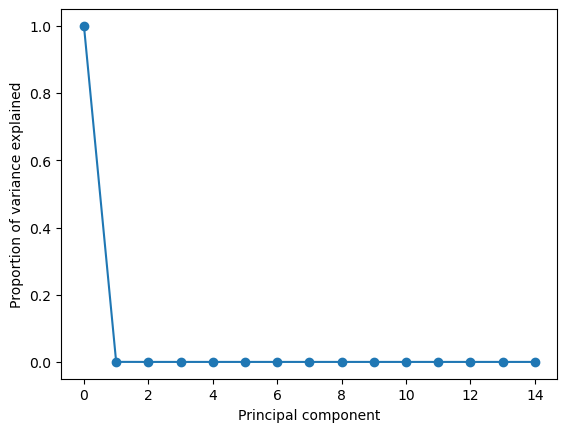

In [ ]:
# Creating a scree plot
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_[:15], 'o-')
ax.set_xlabel('Principal component')
ax.set_ylabel('Proportion of variance explained')
fig.show()

In [ ]:
pca.explained_variance_ratio_[:14].sum()*100

99.99999996869931

Although the first principal component explains almost all the variance, we will use 14 principal components, which together explain 99.9% of the variance.

In [ ]:
social_train_reduced = pca.transform(social_train)[:,:14]
social_test_reduced = pca.transform(social_test)[:,:14]
print(social_train_reduced.shape)
print(social_test_reduced.shape)

In [ ]:
np.save('social_train_reduced.npy',social_train_reduced)
np.save('social_test_reduced.npy',social_test_reduced)

In [ ]:
# Measuring the time required to perform dimensionality reduction for a sample of 8
t = time.time()
pca.transform(social_test.iloc[:8,:])[:,:14]
time.time() - t

0.06441330909729004

### 4.2 Image Features

In [ ]:
# Obtaining principal components of image features
pca = IncrementalPCA()
pca.fit(vgg19_train)

IncrementalPCA()

/tmp/ipykernel_64264/3115495777.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


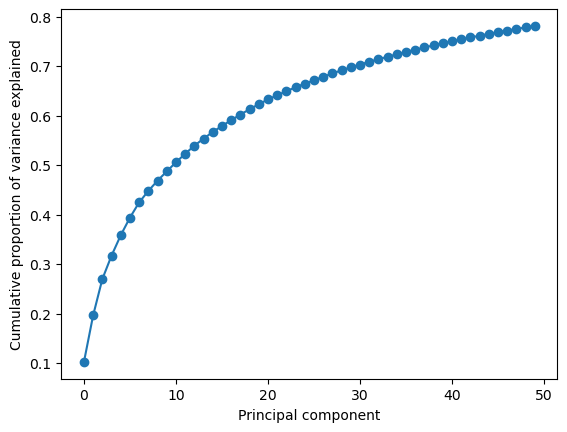

In [ ]:
# Creating a scree plot
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_.cumsum()[:50], 'o-')
ax.set_xlabel('Principal component')
ax.set_ylabel('Cumulative proportion of variance explained')
fig.show()

In [ ]:
# Obtaining the index of the principal component that explains at least 80% of the variance
np.argmax(pca.explained_variance_ratio_.cumsum()>0.80)

56

Thus, we will use 57 principal components that explain over 80% of the variance.

In [ ]:
vgg19_train_reduced = pca.transform(vgg19_train)[:,:57]
vgg19_test_reduced = pca.transform(vgg19_test)[:,:57]
print(vgg19_train_reduced.shape)
print(vgg19_test_reduced.shape)

In [ ]:
np.save('vgg19_train_reduced.npy',vgg19_train_reduced)
np.save('vgg19_test_reduced.npy',vgg19_test_reduced)

In [ ]:
# Measuring the time required to perform dimensionality reduction for a sample of 8
t = time.time()
pca.transform(vgg19_test[:8,:])[:,:20]
time.time() - t

0.002256155014038086

## 5 Building the VSCNN Model

In [ ]:
# Specifying the architecture of the social network

def social_network(S):
    # S_prime = tf.keras.layers.BatchNormalization()(S)
    S_prime = tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu')(S)
    S_prime = tf.keras.layers.Dropout(0.1)(S_prime)
    S_prime = tf.keras.layers.BatchNormalization()(S_prime)
    S_prime = tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu')(S_prime)
    S_prime = tf.keras.layers.Dropout(0.1)(S_prime)
    S_prime = tf.keras.layers.BatchNormalization()(S_prime)
    S_prime = tf.keras.layers.Conv1D(filters=128, kernel_size=2, activation='relu')(S_prime)
    S_prime = tf.keras.layers.Flatten()(S_prime)
    return S_prime

In [ ]:
# Specifying the architecture of the visual network

def visual_network(V):
    # V_prime = tf.keras.layers.BatchNormalization()(V)
    V_prime = tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu')(V)
    V_prime = tf.keras.layers.Dropout(0.1)(V_prime)
    V_prime = tf.keras.layers.BatchNormalization()(V_prime)
    V_prime = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(V_prime)
    V_prime = tf.keras.layers.Dropout(0.1)(V_prime)
    V_prime = tf.keras.layers.BatchNormalization()(V_prime)
    V_prime = tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu')(V_prime)
    V_prime = tf.keras.layers.Flatten()(V_prime)
    return V_prime

In [ ]:
# Specifying the architecture of the overall VSCNN model

def VSCNN(S_shape,V_shape):
    S = tf.keras.Input(S_shape)
    S_prime = social_network(S)

    V = tf.keras.Input(V_shape)
    V_prime = visual_network(V)


    Z = tf.keras.layers.Concatenate()([S_prime,V_prime])
    Z = tf.keras.layers.Dropout(0.1)(Z)
    Z = tf.keras.layers.Dense(1024,'relu')(Z)
    Z = tf.keras.layers.Dropout(0.2)(Z)
    Z = tf.keras.layers.Dense(512,'relu')(Z)
    y = tf.keras.layers.Dense(1)(Z)

    model = tf.keras.Model(inputs=[S, V], outputs=y)
    return model

In [ ]:
model = VSCNN((14,1),(20,1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 14, 1)]              0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 20, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 13, 32)               96        ['input_1[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 18, 32)               128       ['input_2[0][0]']             
                                                                                              

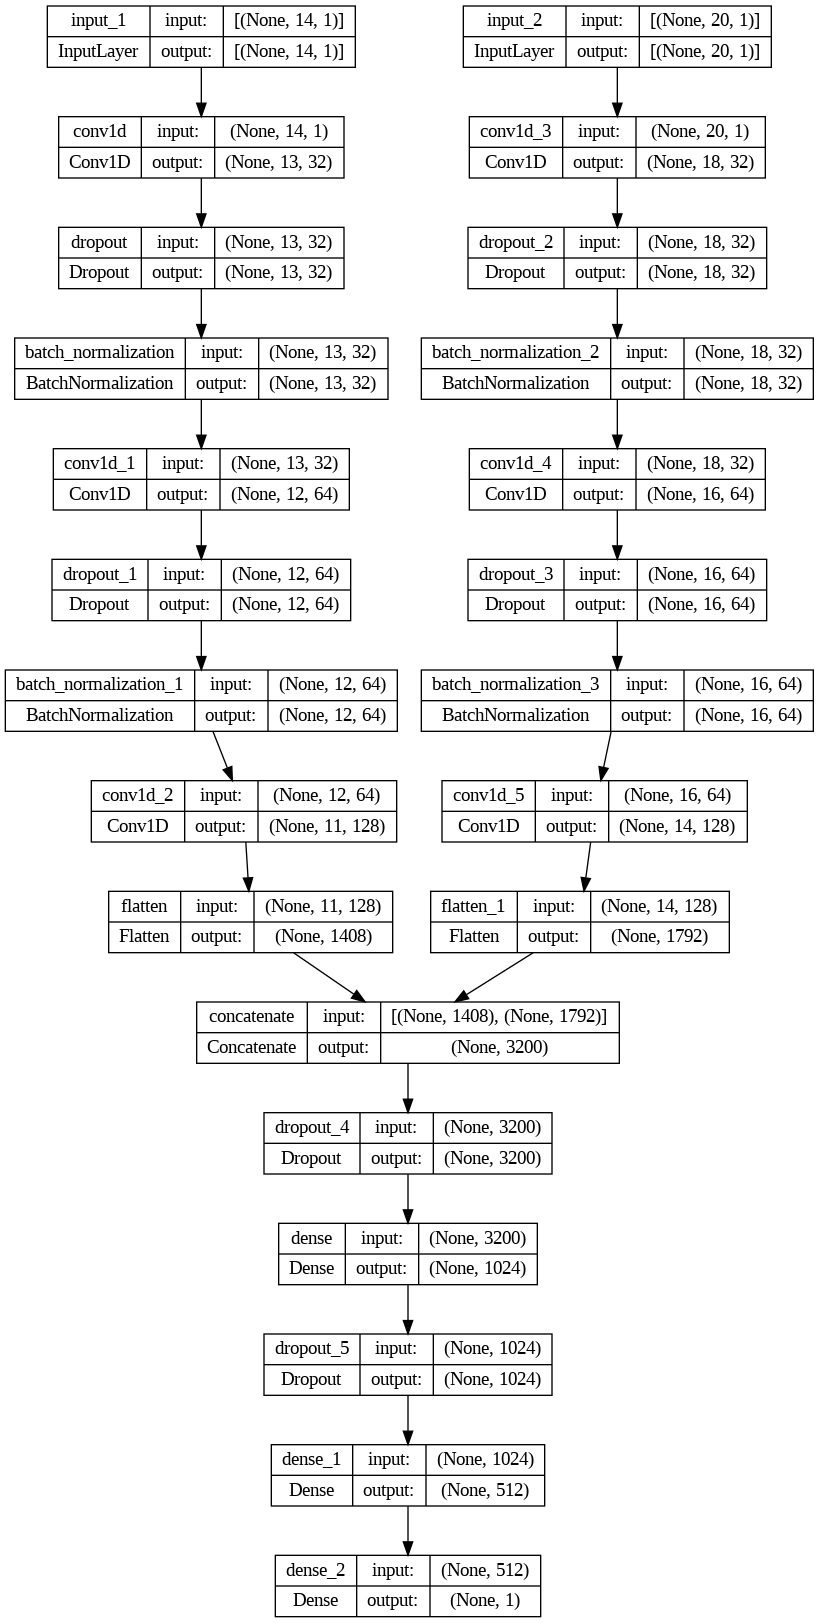

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

## 6 Training the VSCNN Model

In [ ]:
# Compiling the model
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

In [ ]:
# Preparing the data for training
social_train_reduced = np.load('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/social_train_reduced.npy')
social_test_reduced = np.load('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/social_test_reduced.npy')

In [ ]:
vgg19_train_reduced = np.load('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/vgg19_train_reduced.npy')[:,:20]
vgg19_test_reduced = np.load('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/vgg19_test_reduced.npy')[:,:20]

In [ ]:
# Preparing the validation data
social_val_reduced = social_test_reduced[:social_test_reduced.shape[0]//2,:]
vgg19_val_reduced = vgg19_test_reduced[:vgg19_test_reduced.shape[0]//2,:]

social_test_reduced = social_test_reduced[social_test_reduced.shape[0]//2:,:]
vgg19_test_reduced = vgg19_test_reduced[vgg19_test_reduced.shape[0]//2:,:]

In [ ]:
y_val = y_test[:y_test.shape[0]//2]
y_test = y_test[y_test.shape[0]//2:]

In [ ]:
# Training the model
callbacks = [tf.keras.callbacks.ModelCheckpoint('./weights.{epoch:02d}-{val_loss:.2f}.hdf5')]

history = model.fit(x=[social_train_reduced,vgg19_train_reduced],y=y_train,epochs=50,batch_size=48,validation_data=((social_val_reduced,vgg19_val_reduced),y_val),callbacks=callbacks,use_multiprocessing=True)

Epoch 1/50
911/911 [==============================] - ETA: 0s - loss: 2.0091 - mae: 2.0091

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


911/911 [==============================] - 19s 11ms/step - loss: 2.0091 - mae: 2.0091 - val_loss: 1.9322 - val_mae: 1.9322
Epoch 2/50
911/911 [==============================] - 9s 10ms/step - loss: 1.9176 - mae: 1.9176 - val_loss: 1.9244 - val_mae: 1.9244
Epoch 3/50
911/911 [==============================] - 9s 10ms/step - loss: 1.8857 - mae: 1.8857 - val_loss: 1.8558 - val_mae: 1.8558
Epoch 4/50
911/911 [==============================] - 9s 10ms/step - loss: 1.8600 - mae: 1.8600 - val_loss: 1.8907 - val_mae: 1.8907
Epoch 5/50
911/911 [==============================] - 9s 10ms/step - loss: 1.8420 - mae: 1.8420 - val_loss: 1.8209 - val_mae: 1.8209
Epoch 6/50
911/911 [==============================] - 9s 9ms/step - loss: 1.8115 - mae: 1.8115 - val_loss: 1.7938 - val_mae: 1.7938
Epoch 7/50
911/911 [==============================] - 8s 9ms/step - loss: 1.7921 - mae: 1.7921 - val_loss: 1.8463 - val_mae: 1.8463
Epoch 8/50
911/911 [==============================] - 9s 10ms/step - loss: 1.7703

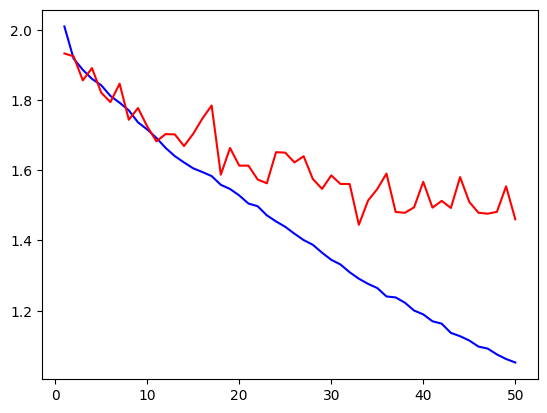

In [ ]:
# Plotting training and validation losses
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = np.arange(1,len(training_loss)+1)
fig,ax = plt.subplots()
ax.plot(epochs,training_loss,label='Training Loss',color='blue')
ax.plot(epochs,validation_loss,label='Validation Loss',color='red')
fig.show()

Training and validation losses decrease together till about epoch 20, after which the rate of improvement in validation loss slows down. The model corresponding to epoch 33, which has a low validation loss without significant overfitting will be finalised.

## 7 Evaluating the VSCNN Model

In [ ]:
model = tf.keras.saving.load_model('/content/drive/MyDrive/M.Sc. Dissertation/Data & Code/weights.33-1.44.hdf5')

In [ ]:
model.evaluate(x=[social_test_reduced,vgg19_test_reduced],y=y_test,batch_size=48,use_multiprocessing=True)

114/114 [==============================] - 1s 3ms/step - loss: 1.4108 - mae: 1.4108


[1.410799264907837, 1.410799264907837]

In [ ]:
# Calculating Spearman's Rho on the test set
y_test_pred = model.predict(x=[social_test_reduced,vgg19_test_reduced],use_multiprocessing=True)
rho,p_value = stats.spearmanr(y_test_pred,y_test)

171/171 [==============================] - 1s 3ms/step


In [ ]:
rho

0.6251015491855602

Thus, the trained model has an MAE of 1.4108 and SRC of 0.625 at test time.

## 8 Measuring Inference Latency

In [ ]:
t = time.time()
model.predict(x=[social_test_reduced[:8,:],vgg19_test_reduced[:8,:]],batch_size=8,use_multiprocessing=True)
time.time() - t

1/1 [==============================] - 2s 2s/step


2.458400249481201